In [64]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy

In [101]:
# Reading the training data
data_train = pd.read_csv('ex3_train.csv', sep=",", encoding='utf-8', header='infer')
df_train = data_train

y_train = df_train['y']
X_train = df_train.drop(['y'], axis=1)

print(X_train.shape)
print(y_train.shape)


(3500, 400)
(3500,)


7    0
Name: y, dtype: int64


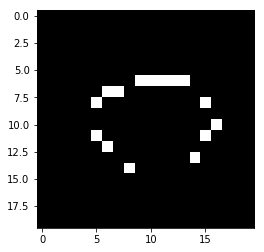

In [102]:
# Reading the test data
data_test = pd.read_csv('ex3_test.csv', sep=",", encoding='utf-8', header='infer')
df_test = data_test

y_test = df_test['y']
X_test = df_test.drop(['y'], axis=1)

#Plot the selected pixel
num = 7
pixels = np.array(X_test[num:num+1], dtype='uint8')
print(y_test[num:num+1])
pixels = pixels.reshape((20, 20))
plt.imshow(pixels, cmap='gray')
plt.show()

In [103]:
# One hot Encoding

def oneHotEncode(y):
    print(y)
    enc = pd.get_dummies(y)
    return enc